In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [9]:
!pip install openpyxl


   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpy


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
df = pd.read_excel('Data.xlsx')
df

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


## Manual Calculation

In [34]:
sum_weight = np.sum(df['Weight'], axis=0)
sum_weight

np.int64(32)

In [29]:
sum_price = np.sum(df['Price'], axis=0)
sum_price

np.int64(330)

In [28]:
sum_weight_price = np.sum(df['Price'] * df['Weight'], axis=0)
sum_weight_price

np.int64(1555)

In [35]:
sum_weight2 = np.sum(df['Weight'] ** 2)
sum_weight2

np.int64(164)

In [36]:
sum_price2 = np.sum(df['Price'] ** 2)
sum_price2

np.int64(16850)

In [25]:
n = df.shape[0]

7

In [37]:
m_manual = ((n * sum_weight_price) - (sum_weight * sum_price)) / ((n * sum_weight2) - ((sum_weight)**2))
m_manual

np.float64(2.620967741935484)

In [41]:
c_manual = np.mean(df['Price']) - (m_manual * np.mean(df['Weight']))
c_manual

np.float64(35.16129032258065)

## Linear Regression using Scikit-Learn

In [21]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [23]:
model = LR.fit(df[['Weight']],df[['Price']])
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
m_scikit = model.coef_
m_scikit

array([[2.62096774]])

In [19]:
c_scikit = model.intercept_
c_scikit

array([35.16129032])

In [49]:
model.predict([[6.5]])

C:\Users\tawsi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[52.19758065]])

## Data Plotting

In [56]:
f"y = {m_scikit}*x + {c_scikit}"

'y = [[2.62096774]]*x + [35.16129032]'

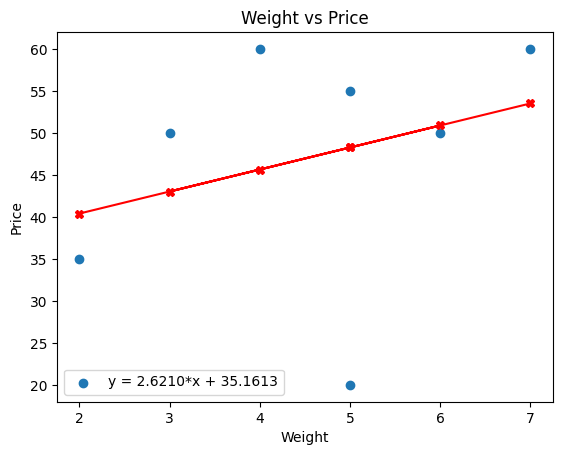

In [65]:
plt.scatter(df[['Weight']], df[['Price']], label=f"y = {m_manual:.4f}*x + {c_manual:.4f}")
plt.title('Weight vs Price')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.plot(df[['Weight']], model.predict(df[['Weight']]), color='Red', marker='X')
plt.legend(loc=0)
plt.show()